In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import json
import re

In [2]:
user=[]
path = '/Users/bjxl/yelp_dataset/yelp_academic_dataset_user.json'

with open(path, encoding='utf-8') as fin:
    i = 0
    for line in fin:
        line_contents = json.loads(line)
        user.append(line_contents)

user=pd.DataFrame(user)
user.to_csv('/Users/bjxl/fyp/csv/user.csv')

In [3]:
user

user_id     name  review_count        yelping_since  \
0        qVc8ODYU5SZjKXVBgXdI7w   Walker           585  2007-01-25 16:47:26   
1        j14WgRoU_-2ZE1aw1dXrJg   Daniel          4333  2009-01-25 04:35:42   
2        2WnXYQFK0hXEoTxPtV2zvg    Steph           665  2008-07-25 10:41:00   
3        SZDeASXq7o05mMNLshsdIA     Gwen           224  2005-11-29 04:38:33   
4        hA5lMy-EnncsH4JoR-hFGQ    Karen            79  2007-01-05 19:40:59   
...                         ...      ...           ...                  ...   
1987892  fB3jbHi3m0L2KgGOxBv6uw  Jerrold            23  2015-01-06 00:31:31   
1987893  68czcr4BxJyMQ9cJBm6C7Q     Jane             1  2016-06-14 07:20:52   
1987894  1x3KMskYxOuJCjRz70xOqQ  Shomari             4  2017-02-04 15:31:58   
1987895  ulfGl4tdbrH05xKzh5lnog  Susanne             2  2011-01-14 00:29:08   
1987896  wL5jPrLRVCK_Pmo4lM1zpA      Isa             2  2020-12-19 02:32:39   

         useful  funny   cool  \
0          7217   1259   5994   
1         43091  13066  27281   
2          2086   1010   1003   
3           512    330    299   
4            29     15      7   
...         ...    ...    ...   
1987892       7      0      0   
1987893       0      0      0   
1987894       1      1      0   
1987895       0      0      0   
1987896       0      0      0   

                                                     elite  \
0                                                     2007   
1        2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2                                 2009,2010,2011,2012,2013   
3                                           2009,2010,2011   
4                                                            
...                                                    ...   
1987892                                                      
1987893                                                      
1987894                                                      
1987895                                                      
1987896                                                      

                                                   friends  fans  ...  \
0        NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1        ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2        LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3        enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4        PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   
...                                                    ...   ...  ...   
1987892                                               None     0  ...   
1987893                                               None     0  ...   
1987894                                               None     0  ...   
1987895                                               None     0  ...   
1987896                                               None     0  ...   

         compliment_more  compliment_profile  compliment_cute  \
0                     65                  55               56   
1                    264                 184              157   
2                     13                  10               17   
3                      4                   1                6   
4                      1                   0                0   
...                  ...                 ...              ...   
1987892                0                   0                0   
1987893                0                   0                0   
1987894                0                   0                0   
1987895                0                   0                0   
1987896                0                   0                0   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
0                     18              232               844              467   
1                    251             1847              7054             3131   
2                      3           

In [5]:
user[user["review_count"]>500].count()

user_id               8570
name                  8570
review_count          8570
yelping_since         8570
useful                8570
funny                 8570
cool                  8570
elite                 8570
friends               8570
fans                  8570
average_stars         8570
compliment_hot        8570
compliment_more       8570
compliment_profile    8570
compliment_cute       8570
compliment_list       8570
compliment_note       8570
compliment_plain      8570
compliment_cool       8570
compliment_funny      8570
compliment_writer     8570
compliment_photos     8570
dtype: int64

In [6]:
user_more_than_500=user[user["review_count"]>500]
user_more_than_500.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_500.csv')

In [7]:
user_more_than_500

user_id      name  review_count        yelping_since  \
0        qVc8ODYU5SZjKXVBgXdI7w    Walker           585  2007-01-25 16:47:26   
1        j14WgRoU_-2ZE1aw1dXrJg    Daniel          4333  2009-01-25 04:35:42   
2        2WnXYQFK0hXEoTxPtV2zvg     Steph           665  2008-07-25 10:41:00   
5        q_QQ5kBBwlCcbL1s4NVK3g      Jane          1221  2005-03-14 20:26:35   
11       xoZvMJPDW6Q9pDAXI0e_Ww      Ryan           535  2009-05-27 06:12:10   
...                         ...       ...           ...                  ...   
1829076  E9T0Irm2d52T2yh1r0DwEA     Susan           553  2012-10-29 04:58:51   
1832339  evX3hPoTbfcvb_D13O1P2A       Hai           517  2016-04-24 06:22:58   
1835121  BEEwA-hzBRPxMZi8ilRlMA     Megan           530  2012-02-07 20:49:38   
1843592  vSVWzD6beYvHjwQ7-FkvWw       Tim           758  2012-10-11 16:40:53   
1855349  -AL9mIJSpdWHQf4BBeDXgg  Mary Lou           907  2011-05-05 18:33:53   

         useful  funny   cool  \
0          7217   1259   5994   
1         43091  13066  27281   
2          2086   1010   1003   
5         14953   9940  11211   
11         1130    487    573   
...         ...    ...    ...   
1829076     232     71    143   
1832339     490    117    284   
1835121     809    165    420   
1843592    1146    286    461   
1855349     622    109    401   

                                                     elite  \
0                                                     2007   
1        2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2                                 2009,2010,2011,2012,2013   
5             2006,2007,2008,2009,2010,2011,2012,2013,2014   
11                                     2009,2010,2011,2012   
...                                                    ...   
1829076                          2017,2018,2019,20,20,2021   
1832339                          2017,2018,2019,20,20,2021   
1835121                2015,2016,2017,2018,2019,20,20,2021   
1843592                                2015,2016,2017,2018   
1855349                               2018,2019,20,20,2021   

                                                   friends  fans  ...  \
0        NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1        ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2        LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
5        xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...  1357  ...   
11       6tbXpUIU6upoeqWNDo9k_A, Vlab9b73R5qPLIv6tE4DJA...    31  ...   
...                                                    ...   ...  ...   
1829076  WPBrjBbk76ZtZQ8QpG09cQ, o5N3kGbZs242XKfqnQbNbw...    21  ...   
1832339  iY6rc4hkIZ6gnpWhcN8mXw, TSf8vsQKua6pPM4AdX1g1A...    15  ...   
1835121  khReVzlOHG2JcBgob3zRyg, 5QXgu1DiH7_CgVDmYYpXXw...    30  ...   
1843592  bvMpxq19crfB2LJ4R5qE7Q, 4lXwcTkAaoZoO17y9eOljQ...    26  ...   
1855349  W-ZjhJYNdwPLf0spRybSwQ, rNVFGJ0IFWRuNCsDYjXaag...    34  ...   

         compliment_more  compliment_profile  compliment_cute  \
0                     65                  55               56   
1                    264                 184              157   
2                     13                  10               17   
5                    163                 191              361   
11                     9                   1                3   
...                  ...                 ...              ...   
1829076                0                   0                0   
1832339                1                   0                0   
1835121                0                   0                0   
1843592                0                   0                0   
1855349                2                   1                1   

         compliment_list  compliment_note  compliment_plain  compliment_cool  \
0                     18              232               844              467   
1                    251             1847              7054             3131   
2                      

In [10]:
friends_8570=[]
for friends in user_more_than_500["friends"]:
    friend_in_500=[]
    friends=re.split(", ",friends)
    for i in range(0,len(friends)):
        for user_id in user_more_than_500["user_id"]:
            if friends[i]==user_id:
                 friend_in_500.append(friends[i])
    friends_8570.append(friend_in_500)
                
#         if friends[i] in user_more_than_500["user_id"]:
#             friend_in_500.append(friends[i])
friends_8570

[['1aU0r7X2luo9P8hfSpq6ng',
  'TMLVzNYs-zwwREudyvI08A',
  '-f6amuvfIVS7VX65BqZ6pQ',
  '3gE3_MDUsCg-Tay4t1R5nA',
  'zlqbbhAujrMla0eDiK7mIw',
  'kaKEer3UR5utYZsgp2tgPw',
  'eCcjxh8zjAqn-kZVWZ_HJQ',
  'ptLIFLUPwg3MYt-J62s3iA',
  'K_yjrrDZBSic30Gr-dopqA',
  '0-n89YwF9LExnPIwgIVhoA',
  'nT3tLANzGy0a7DuB_GIQjA',
  'Ud6j2HN40qEhycq2PuwcBA',
  '_xzu_cuxhcbbfx6ASYev_g',
  '-_dGQOHpKRFgDy5yTjjlUQ',
  'hVPyu7QWaSQgOlz0rppmkg',
  'GXn4ZsasLKh0qZ5g3nIqcQ',
  'om5ZiponkpRqUNa3pVPiRg',
  'w6DoAYVMd5r0vXPbSZcU5Q',
  '3GiMheHTAzo85rBm0W_Yww',
  'R_S07piLpe_LHU0yKyYOzg',
  'ZYZNcugF3xUEGyLOVGiZ0Q',
  'XDnlriVXnZgFYXHqphBJ3g',
  'LVhWEqGNnk8VQI1hw_zV0A',
  'sDGwhNAQIubV36t_fex6VA',
  'wCtf5_zG8EpWiBp_Oi7P0g',
  'rVA85dMsTw7B6v2opDuMuQ',
  '50wPDE_Gk936RYV7i4FJhw',
  'p4FsOflitbyFKseYi1610Q',
  'HEgmHFEU3QJzAO7mT3gynw',
  'lufa4bHQd3XLYQE1zXis0g',
  'P_Jv8vuqPL4iACf_Evy7TQ',
  'oKrct4Hc8hZNMYXecitLCw',
  'NOUfyJW-BAo_-Cbfo8edww',
  'JAFgOs6sMkZEE_nmwHXejw',
  'zjcN27kCVeK8K2ONe9Qt4g',
  'lX89A57ZsdTGx2BXa

In [11]:
user_more_than_500["friends_500"]=friends_8570

/var/folders/cv/j22vlhb52tb_nhwbf2m_cdq40000gn/T/ipykernel_2244/1960704044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_more_than_500["friends_500"]=friends_8570


In [12]:
user_more_than_500
user_more_than_500.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_500.csv')

In [13]:
user_friend=user_more_than_500[["user_id","friends_500"]]
user_friend.to_csv('/Users/bjxl/fyp/csv/user_friends.csv')

In [14]:
user_friend=pd.read_csv('/Users/bjxl/fyp/csv/user_friends.csv')

In [15]:
user_friend=user_friend.drop(columns=["Unnamed: 0"])
user_friend.to_csv('/Users/bjxl/fyp/csv/user_friends.csv')

In [16]:
user_friend

user_id  \
0     qVc8ODYU5SZjKXVBgXdI7w   
1     j14WgRoU_-2ZE1aw1dXrJg   
2     2WnXYQFK0hXEoTxPtV2zvg   
3     q_QQ5kBBwlCcbL1s4NVK3g   
4     xoZvMJPDW6Q9pDAXI0e_Ww   
...                      ...   
8565  E9T0Irm2d52T2yh1r0DwEA   
8566  evX3hPoTbfcvb_D13O1P2A   
8567  BEEwA-hzBRPxMZi8ilRlMA   
8568  vSVWzD6beYvHjwQ7-FkvWw   
8569  -AL9mIJSpdWHQf4BBeDXgg   

                                            friends_500  
0     ['1aU0r7X2luo9P8hfSpq6ng', 'TMLVzNYs-zwwREudyv...  
1     ['ueRPE0CX75ePGMqOFVj6IQ', 'E_GAXhVA1_lVC2aFpM...  
2     ['pypZb3V5TXHOnlTj-qLSrw', 'irkRHMqg9oSt7lv3OS...  
3     ['7GPNBO496aecrjJfW6UWtg', 'NXw0bCLF5ZtFMfhcj7...  
4     ['6tbXpUIU6upoeqWNDo9k_A', 'daYwff3kBqb5cD8aBZ...  
...                                                 ...  
8565  ['WPBrjBbk76ZtZQ8QpG09cQ', 'fExL6u06xTSg13k945...  
8566  ['qZ3sJPn5NqSVFMLYGAJH_A', 'JggphOM7FIbvUyPcsf...  
8567  ['4paWpLov6LjpsNNgE1fhSg', 'aWH1hyq818tETdU79E...  
8568  ['igll2PdsMvQHzJhzttrx1A', 'ET8n-r7glWYqZhuR6G...  
8569  ['eAYyPwGQ-Am-sOvCHI8Hqw', '1AmDkEN8U7FiRe7xZe...  

[8570 rows x 2 columns]

In [17]:
user_more_than_500=pd.read_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_500.csv')
user_more_than_500=user_more_than_500.drop(columns=["Unnamed: 0"])
user_more_than_500.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_500.csv')
user_more_than_500

user_id      name  review_count        yelping_since  \
0     qVc8ODYU5SZjKXVBgXdI7w    Walker           585  2007-01-25 16:47:26   
1     j14WgRoU_-2ZE1aw1dXrJg    Daniel          4333  2009-01-25 04:35:42   
2     2WnXYQFK0hXEoTxPtV2zvg     Steph           665  2008-07-25 10:41:00   
3     q_QQ5kBBwlCcbL1s4NVK3g      Jane          1221  2005-03-14 20:26:35   
4     xoZvMJPDW6Q9pDAXI0e_Ww      Ryan           535  2009-05-27 06:12:10   
...                      ...       ...           ...                  ...   
8565  E9T0Irm2d52T2yh1r0DwEA     Susan           553  2012-10-29 04:58:51   
8566  evX3hPoTbfcvb_D13O1P2A       Hai           517  2016-04-24 06:22:58   
8567  BEEwA-hzBRPxMZi8ilRlMA     Megan           530  2012-02-07 20:49:38   
8568  vSVWzD6beYvHjwQ7-FkvWw       Tim           758  2012-10-11 16:40:53   
8569  -AL9mIJSpdWHQf4BBeDXgg  Mary Lou           907  2011-05-05 18:33:53   

      useful  funny   cool                                              elite  \
0       7217   1259   5994                                               2007   
1      43091  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2       2086   1010   1003                           2009,2010,2011,2012,2013   
3      14953   9940  11211       2006,2007,2008,2009,2010,2011,2012,2013,2014   
4       1130    487    573                                2009,2010,2011,2012   
...      ...    ...    ...                                                ...   
8565     232     71    143                          2017,2018,2019,20,20,2021   
8566     490    117    284                          2017,2018,2019,20,20,2021   
8567     809    165    420                2015,2016,2017,2018,2019,20,20,2021   
8568    1146    286    461                                2015,2016,2017,2018   
8569     622    109    401                               2018,2019,20,20,2021   

                                                friends  fans  ...  \
0     NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1     ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2     LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3     xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...  1357  ...   
4     6tbXpUIU6upoeqWNDo9k_A, Vlab9b73R5qPLIv6tE4DJA...    31  ...   
...                                                 ...   ...  ...   
8565  WPBrjBbk76ZtZQ8QpG09cQ, o5N3kGbZs242XKfqnQbNbw...    21  ...   
8566  iY6rc4hkIZ6gnpWhcN8mXw, TSf8vsQKua6pPM4AdX1g1A...    15  ...   
8567  khReVzlOHG2JcBgob3zRyg, 5QXgu1DiH7_CgVDmYYpXXw...    30  ...   
8568  bvMpxq19crfB2LJ4R5qE7Q, 4lXwcTkAaoZoO17y9eOljQ...    26  ...   
8569  W-ZjhJYNdwPLf0spRybSwQ, rNVFGJ0IFWRuNCsDYjXaag...    34  ...   

      compliment_profile  compliment_cute  compliment_list  compliment_note  \
0                     55               56               18              232   
1                    184              157              251             1847   
2                     10               17                3               66   
3                    191              361              147             1212   
4                      1                3                5               31   
...                  ...              ...              ...              ...   
8565                   0                0                0                3   
8566                   0                0                0                5   
8567                   0                0                0               24   
8568                   0                0                0                5   
8569                   1                1                0               34   

      compliment_plain  compliment_cool  compliment_funny  compliment_writer  \
0                  844              467               467                239   
1                 7054             3131              3131               1521   
2                   96              119               119                 35   
3            

In [19]:
dic=user_more_than_500["user_id"].to_dict()
dic
nodes=[]
for i in dic:
    nodes.append({'id': i,'user_id': dic[i]})
nodes
# dic1={}
# dic1['index']=nodes.tolist()
dicJson = json.dumps(nodes)
dicJson


'[{"id": 0, "user_id": "qVc8ODYU5SZjKXVBgXdI7w"}, {"id": 1, "user_id": "j14WgRoU_-2ZE1aw1dXrJg"}, {"id": 2, "user_id": "2WnXYQFK0hXEoTxPtV2zvg"}, {"id": 3, "user_id": "q_QQ5kBBwlCcbL1s4NVK3g"}, {"id": 4, "user_id": "xoZvMJPDW6Q9pDAXI0e_Ww"}, {"id": 5, "user_id": "SgiBkhXeqIKl1PlFpZOycQ"}, {"id": 6, "user_id": "QF1Kuhs8iwLWANNZxebTow"}, {"id": 7, "user_id": "MGPQVLsODMm9ZtYQW-g_OA"}, {"id": 8, "user_id": "wAw9FHMiOZd9ROoc5x4DpQ"}, {"id": 9, "user_id": "4ZaqBJqt7laPPs8xfWvr6A"}, {"id": 10, "user_id": "65uUyG9yuF0rdMh0z7ajaA"}, {"id": 11, "user_id": "NIhcRW6DWvk1JQhDhXwgOQ"}, {"id": 12, "user_id": "QJI9OSEn6ujRCtrX06vs1w"}, {"id": 13, "user_id": "AkBtT43dYcttxQ3qOzPBAg"}, {"id": 14, "user_id": "IpLRJY4CP3fXtlEd8Y4GFQ"}, {"id": 15, "user_id": "2l0O1EI1m0yWjFo2zSt71w"}, {"id": 16, "user_id": "RgDVC3ZUBqpEe6Y1kPhIpw"}, {"id": 17, "user_id": "OmjMNG77obZOKQ59o-Tx4Q"}, {"id": 18, "user_id": "lquc6IF6uGIeRomDLu9UnA"}, {"id": 19, "user_id": "X7SwvRrnsZ8I3bEPGELpnQ"}, {"id": 20, "user_id": "KxrKV

In [20]:
friends_index=[]
for i in user_more_than_500["friends_500"]:
    friend_index=[]
    i=re.compile('[^A-Z^a-z^0-9^ ]').sub('', i)
    i=re.split(" ", i)
    for j in i:
        n=0
        for user_id in user_more_than_500["user_id"]:
            if j==user_id:
                friend_index.append(n)
            n=n+1    
    friends_index.append(friend_index)  

In [21]:
user_more_than_500["friends_index"]=friends_index
user_more_than_500

user_id      name  review_count        yelping_since  \
0     qVc8ODYU5SZjKXVBgXdI7w    Walker           585  2007-01-25 16:47:26   
1     j14WgRoU_-2ZE1aw1dXrJg    Daniel          4333  2009-01-25 04:35:42   
2     2WnXYQFK0hXEoTxPtV2zvg     Steph           665  2008-07-25 10:41:00   
3     q_QQ5kBBwlCcbL1s4NVK3g      Jane          1221  2005-03-14 20:26:35   
4     xoZvMJPDW6Q9pDAXI0e_Ww      Ryan           535  2009-05-27 06:12:10   
...                      ...       ...           ...                  ...   
8565  E9T0Irm2d52T2yh1r0DwEA     Susan           553  2012-10-29 04:58:51   
8566  evX3hPoTbfcvb_D13O1P2A       Hai           517  2016-04-24 06:22:58   
8567  BEEwA-hzBRPxMZi8ilRlMA     Megan           530  2012-02-07 20:49:38   
8568  vSVWzD6beYvHjwQ7-FkvWw       Tim           758  2012-10-11 16:40:53   
8569  -AL9mIJSpdWHQf4BBeDXgg  Mary Lou           907  2011-05-05 18:33:53   

      useful  funny   cool                                              elite  \
0       7217   1259   5994                                               2007   
1      43091  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2       2086   1010   1003                           2009,2010,2011,2012,2013   
3      14953   9940  11211       2006,2007,2008,2009,2010,2011,2012,2013,2014   
4       1130    487    573                                2009,2010,2011,2012   
...      ...    ...    ...                                                ...   
8565     232     71    143                          2017,2018,2019,20,20,2021   
8566     490    117    284                          2017,2018,2019,20,20,2021   
8567     809    165    420                2015,2016,2017,2018,2019,20,20,2021   
8568    1146    286    461                                2015,2016,2017,2018   
8569     622    109    401                               2018,2019,20,20,2021   

                                                friends  fans  ...  \
0     NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1     ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2     LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3     xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...  1357  ...   
4     6tbXpUIU6upoeqWNDo9k_A, Vlab9b73R5qPLIv6tE4DJA...    31  ...   
...                                                 ...   ...  ...   
8565  WPBrjBbk76ZtZQ8QpG09cQ, o5N3kGbZs242XKfqnQbNbw...    21  ...   
8566  iY6rc4hkIZ6gnpWhcN8mXw, TSf8vsQKua6pPM4AdX1g1A...    15  ...   
8567  khReVzlOHG2JcBgob3zRyg, 5QXgu1DiH7_CgVDmYYpXXw...    30  ...   
8568  bvMpxq19crfB2LJ4R5qE7Q, 4lXwcTkAaoZoO17y9eOljQ...    26  ...   
8569  W-ZjhJYNdwPLf0spRybSwQ, rNVFGJ0IFWRuNCsDYjXaag...    34  ...   

      compliment_cute  compliment_list  compliment_note  compliment_plain  \
0                  56               18              232               844   
1                 157              251             1847              7054   
2                  17                3               66                96   
3                 361              147             1212              5696   
4                   3                5               31                41   
...               ...              ...              ...               ...   
8565                0                0                3                 5   
8566                0                0                5                17   
8567                0                0               24                17   
8568                0                0                5                19   
8569                1                0               34                20   

      compliment_cool  compliment_funny  compliment_writer  compliment_photos  \
0                 467               467                239                180   
1                3131              3131               1521               1946   
2                 119               119                 35                 18   
3                2543            

In [22]:
user_more_than_500.to_csv('/Users/bjxl/fyp/csv/user_review_count_more_than_500.csv')

In [14]:
user_more_than_500.shape

(8570, 23)

/Users/bjxl/opt/anaconda3/envs/yelp-dataset/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


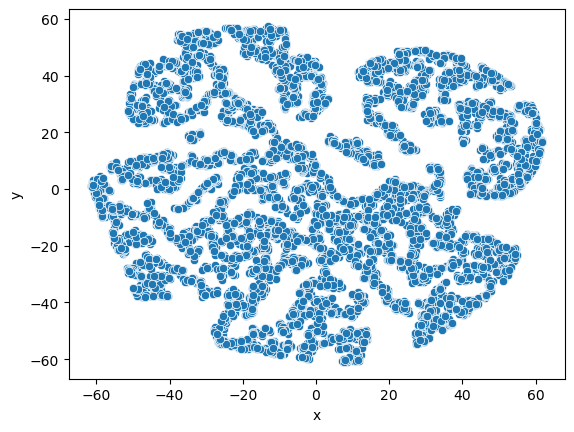

In [48]:
numeric=["review_count","funny"]
df_numeric=user_more_than_500[numeric]
df_numeric.shape
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(df_numeric)
tsne_features[1:4,:]
df=pd.DataFrame()
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]
df
import seaborn as sns
sns.scatterplot(x="x",y="y",data=df)
plt.show()

In [42]:
non_numeric=["user_id","name","yelping_since","elite","friends","fans"]
df_numeric=user_more_than_500.drop(non_numeric,axis=1)

In [89]:
df_numeric.shape

(8570, 17)

In [92]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(df_numeric)
tsne_features[1:4,:]

/Users/bjxl/opt/anaconda3/envs/yelp-dataset/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-18.177912 , -59.316338 ],
       [  3.9301782,  44.274876 ],
       [-24.54584  , -42.640038 ]], dtype=float32)

In [96]:
df=pd.DataFrame()
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]
df

x          y
0    -45.494938 -14.953701
1    -18.177912 -59.316338
2      3.930178  44.274876
3    -24.545839 -42.640038
4     41.692612  18.691515
...         ...        ...
8565  -9.550433 -38.716022
8566  14.808872 -47.062237
8567  40.481758 -22.500923
8568  24.973227   0.895962
8569   5.310577 -16.911552

[8570 rows x 2 columns]

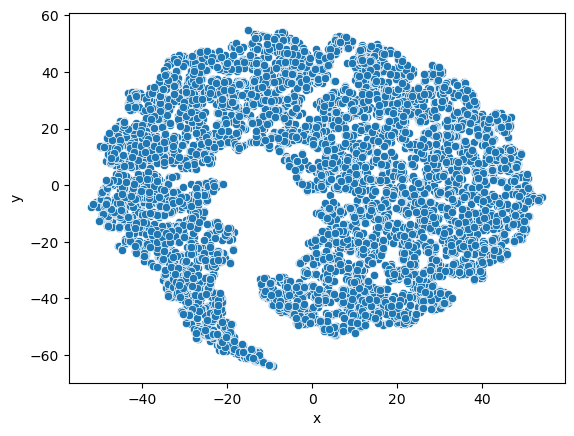

In [113]:
import seaborn as sns
sns.scatterplot(x="x",y="y",data=df)
plt.show()

In [119]:
user_tSNE=user_more_than_500[["useful","funny"]]

In [120]:
user_tSNE.shape

(8570, 2)

/Users/bjxl/opt/anaconda3/envs/yelp-dataset/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


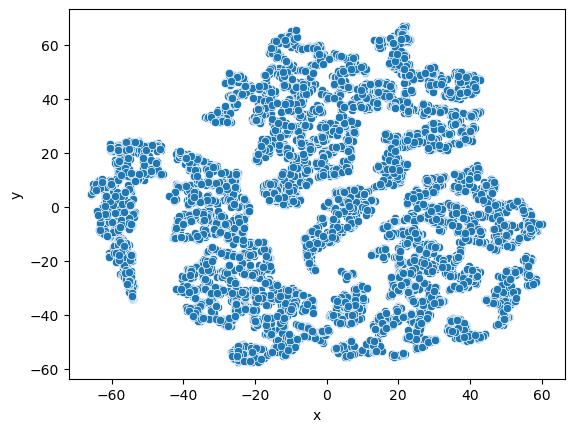

In [121]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)
tsne_features=m.fit_transform(user_tSNE)
tsne_features[1:4,:]
df=pd.DataFrame()
df["x"]=tsne_features[:,0]
df["y"]=tsne_features[:,1]
df
import seaborn as sns
sns.scatterplot(x="x",y="y",data=df)
plt.show()